# Table of Contents
- Introduction
- Prelimnary Wrangling
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration
- Conclusions

## Introduction

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area for the duration of Febraury 2019.

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [7]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [8]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [10]:
#Change start_time and end_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [11]:
#Change bike_share_for_all_trip to boolean
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [12]:
#Change bike_share_for_all_trip to boolean
#df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null datetime64[ns]
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(7), int64(2), object(4)
me

In [14]:
# Finding how many bikes there are in this dataset
df.bike_id.nunique()

4646

In [15]:
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null bool
dtypes: bool(1), datetime64[ns](2), float64(7), int64(2), object(4)
me

In [17]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False


In [18]:
# Creating an Age based column.
df['user_age'] = 2022 - df['member_birth_year']

In [19]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,38.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,50.0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,33.0
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,48.0
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False,63.0


In [20]:
df.user_age.sample(5)

22424     28.0
105091    39.0
50616     31.0
75166     53.0
94927     39.0
Name: user_age, dtype: float64

In [21]:
df['user_age'] = df['user_age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null bool
user_age                   174952 non-null int64
dtypes: bool(1), date

In [22]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,False,38
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,False,50
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,False,33
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,True,48
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,False,63


### What is the structure of your dataset?
- There are 183412 rows (fordgobike trips), 4646 bikes. The trips in the dataset have 16 variables (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip) two of them are datetime, four are object type and 1 is bolean type and the rest are numerical.


### What is/are the main feature(s) of interest in your dataset?
- I'm mostly interested in finding out the variables impacting the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
- I expect that the trip duration is mostly impacted by the start stations and end stations also user_type, birthyear and gender should also effect trip duration.

## Univariate Exploration

#### Average bike trip in seconds

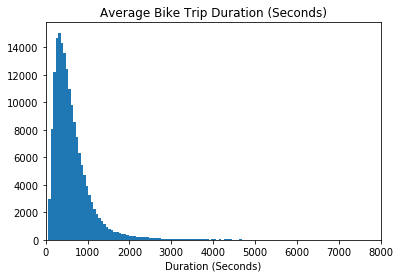

In [23]:
#Plotting of the average trip duration as a main variable.
bin_edges = np.arange(0, df['duration_sec'].max() + 100 , 60)
plt.hist(data = df , x = 'duration_sec' , bins = bin_edges)
plt.xlim(0,8000)
plt.title('Average Bike Trip Duration (Seconds)')
plt.xlabel('Duration (Seconds)');

There is not much to look into so let's try to convert the seconds into minutes so we can have a better look at the distrubtion

In [24]:
# Converting the seconds to minutes.
df['duration_min'] = df['duration_sec'] / 60

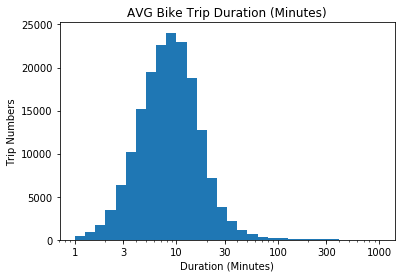

In [25]:
#Let's put it into log scale for better look at the distrubtion
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = bins);
plt.xscale('log');
plt.xticks(ticks,labels);
plt.xlabel('Duration (Minutes)');
plt.title('AVG Bike Trip Duration (Minutes)');
plt.ylabel('Trip Numbers');

We can see that the majority lasting below the 10 minutes mark and the average trip lasts between 1 and around 100 minutes

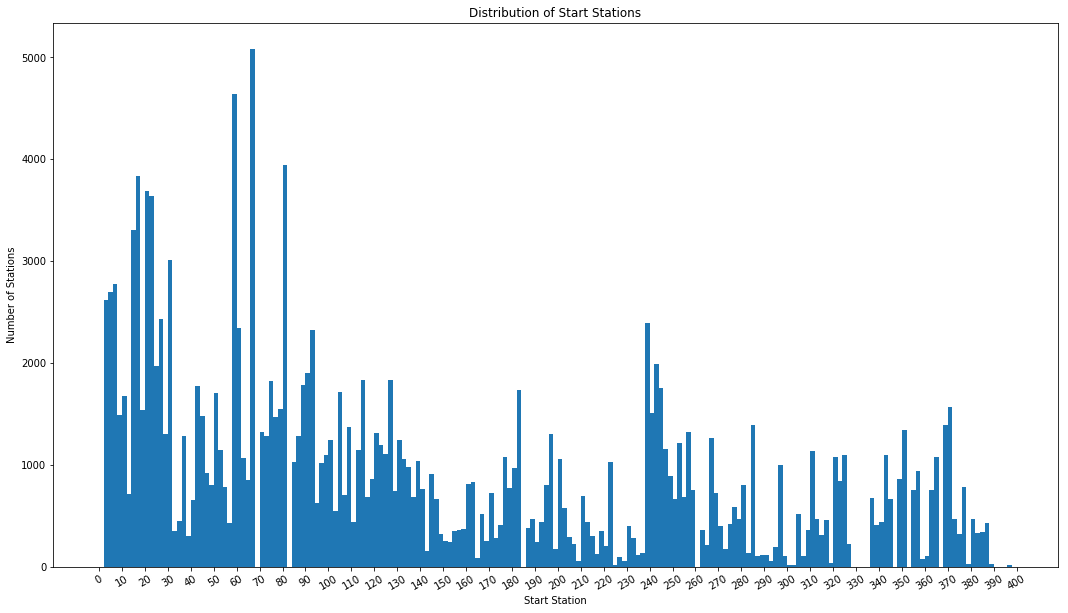

In [26]:
# The distrubtion of  start station id.
binsize = 2
bins = np.arange(0, df['start_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[18, 10])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'start_station_id', bins = bins)
plt.title('Distribution of Start Stations')
plt.xlabel('Start Station')
plt.xticks(rotation = 30)
plt.ylabel('Number of Stations');

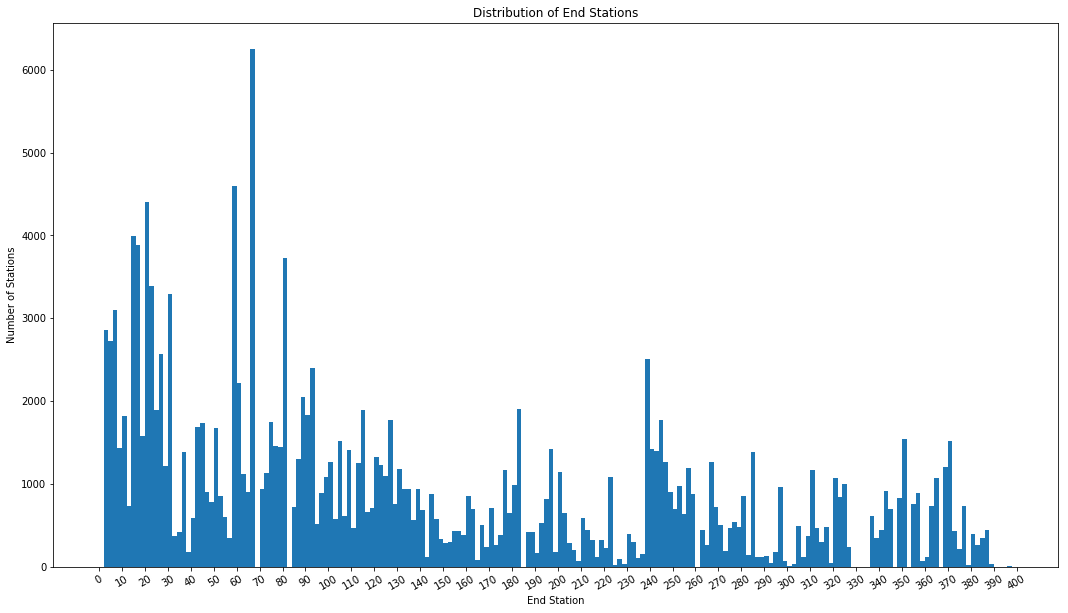

In [27]:
# The distrution of end station id.
binsize = 2
bins = np.arange(0, df['end_station_id'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[18, 10])
plt.xticks(range(0, 401, 10))
plt.hist(data = df.dropna(), x = 'end_station_id', bins = bins)
plt.title('Distribution of End Stations')
plt.xlabel('End Station')
plt.xticks(rotation = 30)
plt.ylabel('Number of Stations');

It is obvious that some station are frequent as start station and end station. 69 also has the highest. 

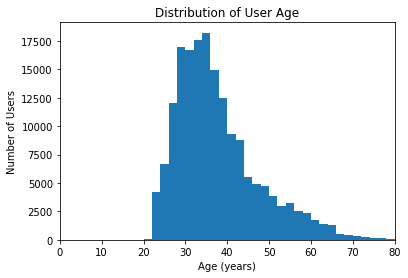

In [28]:
# The age distribution derived from member's birth year.
bin_size = 2
bins = np.arange(0, df['user_age'].max()+binsize, bin_size)
plt.hist(data = df.dropna(), x = 'user_age', bins = bins)
plt.xlim(0,80)
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users');

The majority of the distrubtion is between the age of 20 to 40 years old

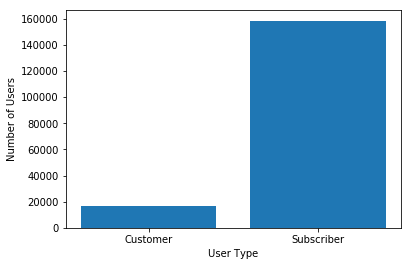

In [29]:
# The distrubtion of types of users.
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts() )
plt.xlabel('User Type')
plt.ylabel('Number of Users');

We can see that the majority of trips are led by Subscribers rather than Customers.

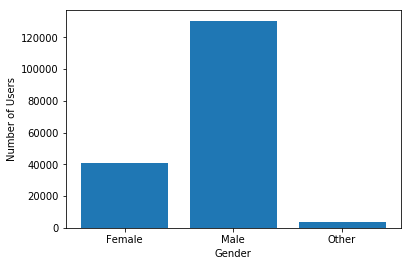

In [30]:
# The distrubtion of genders of users.
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.xlabel('Gender')
plt.ylabel('Number of Users');

The male users are dominating the trips with more than 12000 users while the females are around or slightly more 4000 users.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- The trip duration intial visulization was concentrated around an area so I changed the trip by seconds to minutes and used log transform for a better look at the data.

- Creating user_age column to be able get an insight on the impact of age.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
- Looking at the distrubtion of birth year was challenging, so with a little guidance I came to the idea of looking at the distrubtion by age and to do so, I converted to it by substracting the birth year from current year which gave us a better percetion of the impact of age on the trip duration.

## Bivariate Exploration


The correlation between trip duration and age.

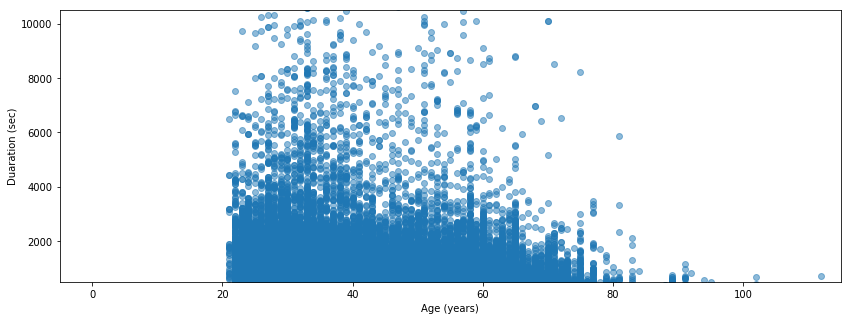

In [31]:
plt.figure(figsize=[14,5])
plt.scatter(df['user_age'], df['duration_sec'], alpha = 0.5, marker = 'o' )
plt.axis([-5, 115, 500, 10500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)');

Most trips are below age of 80 and 6000 seconds so we need to dive deeper and look at the distrubtion within these values

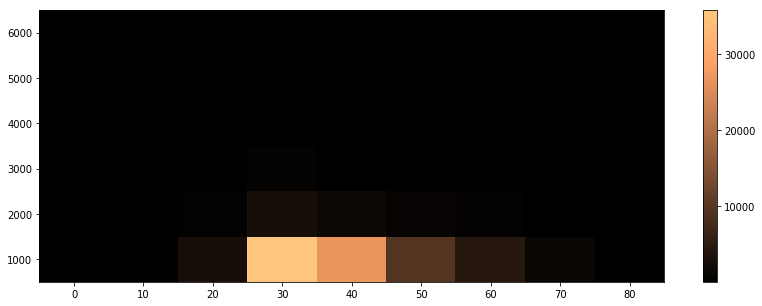

In [32]:
plt.figure(figsize=[14,5])
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(df['user_age'], df['duration_sec'],
           bins = [bins_x, bins_y],cmap='copper')
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);

We can see that the majority of users are between 15 to 45 years old with concentrated high duartion of trips around the age of 30 years old.


#### Let's look at the impact of both start station and end station on trip duration

In [33]:
# Identifying the unique values in the `start_station_id`
df.start_station_id.nunique()

329

In [34]:
# Sorting out total duration for Start Stations
st = []
every_start_station_ids = sorted(df.start_station_id.unique())
for x in every_start_station_ids:
    st.append(df[df.start_station_id == x].duration_sec.sum())
total_duration = pd.Series(st)

In [35]:
# Ploting
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'].dropna(), y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('Start Station')
plt.xticks(rotation = 30)
plt.ylabel('Total Duration')
plt.title('Impact of Trip Duration on Start Station');

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [ ]:
# Sorting out total duration for End Stations
st = []

every_end_station_ids = sorted(df.end_station_id.unique())
for x in every_end_station_ids :
    st.append(df[df.end_station_id == x].duration_sec.sum()) 
total_duration = pd.Series(st)


In [ ]:
# Plotting 
plt.figure(figsize = [20, 8])
sb.lineplot(x = df['start_station_id'], y = total_duration)
plt.xticks(range(0, 401, 10))
plt.xlabel('End Station')
plt.xticks(rotation = 30)
plt.ylabel('Total Duration')
plt.title('Impact of Trip Duration on End Station');

We can see that the duration for some stations as a start station for some are higher and for others as end stations are higher.

Also we can detect a pattern of stations which might result in longer trip duration.


#### The correlation between trip duration and both gender and member type

In [ ]:
# Plotting
plt.figure(figsize = [10, 5])
vis_color = sb.color_palette()[9]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = vis_color)
plt.ylim([-10, 2000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)');

The amount of male riders are obviously higher than the others but the longer trips came from other and females more than males

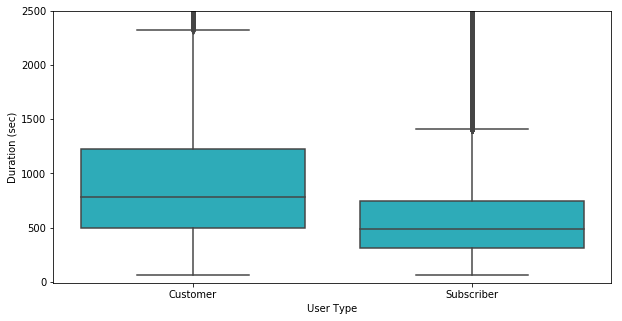

In [36]:
# Plotting duration of trip against user type
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[9]
sb.boxplot(data = df, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)');

We can see that the longer trips were preformed more by Customers more than Subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
- Since an activity like riding a bike is correlated with health so it's expected that the user's age is contributing the trip duration and as observed that the majority of long trips came from users between the age of 20 to 40 years old.

- On the Other hand, Start station and end station's observation didn't yeild much to determine the trip duration. We only came to the conclusion that some stations leads to longer trip duration as a starting station while others lead to longer duration as ending station.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- Gender: the intial observation led that male users are more than the others but diving deeper revealed that while males take more trips, females and other have higher percentage of leading a longer trip than males.

- User Type: While Subscribers have higher number of users than the others, looking at the correlation regarding longer durations of trips led to the conclusion that customers have higher percentage of leading a longer duration.

## Multivariate Exploration

Here we will explore the how both gender and user type (two categorical variables)

In [37]:
# Age and Gender distribution against trip duration
df['age'] = (2022 - df['member_birth_year'])
genders = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, height = 7,
                 xlim = [10, 80], ylim = [-500, 9000])
genders.map(plt.scatter, 'age', 'duration_sec', alpha=0.5)
genders.set_xlabels('Age (year)')
genders.set_ylabels('Duration (sec)');

TypeError: __init__() got an unexpected keyword argument 'height'

We can see a more frequent longer duration for Other between the age of 50 to 60 years old

In [39]:
# Age and User Type distribution against trip duration
user_types = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, height = 7,
                 xlim = [10, 80], ylim = [-500, 9000])
user_types.map(plt.scatter, 'age', 'duration_sec', alpha=0.25)
user_types.set_xlabels('Age (year)')
user_types.set_ylabels('Duration (sec)');

TypeError: __init__() got an unexpected keyword argument 'height'

We can see that both Customer and Subscriber are the same regarding the trends for age and trip duration

It's noticeable that there is a slightly higher age for subscribers having higher duration trips than customers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
- Here we reached the conclution that even though the number of higher duration trip is higher for male but percentage is higher for women and other, also other has one more peak at nearly the age of 60 years for higher duration time.

- Regarding different user types both are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers having better trip duration.



### Were there any interesting or surprising interactions between features?
- The peak for other gender at older age.

- The slight tilt to higher age for subscribers having better trip duration.

## Conclusions

- This was an interesting dataset with amazing observations even though this data was for just a month. Before performing analysis on the dataset, I wrangled the data and deleted rows with null values, changed the data types for some columns and added new columns to the dataframe.

*Some of the findings I got are:*

- Males make up 74.6 of the users while femsales make up 23.3%.
- Males are more likely to share bikes for all trip than females.
- Most of the users are between the ages 20-40.
- There are more rides recorded during the weekday than the weekends.